In [1]:
# Import Dependencies
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import pandas as pd
import matplotlib.pyplot as plt

## Titanic
Keywords: multivariate, classification.

## Description
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this skill drill, you are being asked to build a predictive model that answers the question: “who is more likely to survive?” using passenger data (ie age, gender, socio-economic class, etc). The variables included in the dataset are the following:

- PassengerID: Passenger identifier
- Pclass: Ticket class - 1 = 1st; 2 = 2nd; 3 = 3rd;
- Sex: 0 = Female & 1 = Male
- Age: age in years
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Fare: Passenger fare cost
- Embarked: Port of Embarkation - 0 = Cherbourg; 1 = Queenstown; 2 = Southampton;
- Survived: whether during the shipwreck the individual survived - 0 = did not survive; 1 = survived; (the predicted attribute)

## Source
https://www.kaggle.com/c/titanic/data

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('../Resources/titanic.csv')

In [3]:
df["PassengerId"]

0        1
1        2
2        3
3        4
4        5
      ... 
709    886
710    887
711    888
712    890
713    891
Name: PassengerId, Length: 714, dtype: int64

### Logistic Regression

In [4]:
# Select our independent X variables, and our dependent y variable. 
X = df.drop(columns = ['Survived','PassengerId'])
y = df['Survived']

In [5]:
# Confirm independent variable data types are numeric
print(X.dtypes.unique())

[dtype('int64') dtype('float64')]


In [7]:
# Create our Validation training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

In [8]:
# Create the Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [9]:
# Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [10]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

In [11]:
# Score the model with the testing dataset
print(f'Accuracy: {model.score(X_test, y_test)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Correctly Classified: {accuracy_score(y_test, y_pred, normalize=False)}')
print(f'Total Test Records: {y_test.count()}')

Accuracy: 0.7622377622377622
Accuracy: 0.7622377622377622
Correctly Classified: 109
Total Test Records: 143


In [12]:
# Create DataFrame of results
df_new = pd.DataFrame({"Predicted": y_pred, "Actual": y_test})
df_new

,Predicted,Actual
281,0,0
645,0,0
304,1,1
675,0,0
74,0,0
...,...,...
547,0,1
454,0,0
324,1,0
656,1,1


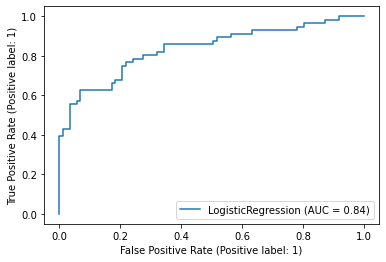

In [13]:
# Plot the ROC (Receiver Operating Characteristic) curve visualize our models accuracy rate
plot_roc_curve(model, X_test, y_test) 